In [21]:
import pandas as pd

## Etape 1 : methodes de choix aléatoire

In [22]:
data= pd.read_table('base_banque_2024_03.txt', sep=';')
data.head()

,id_client,age,sexe,situation_familiale,statut_logement,revenu,flag_tel,flag_email,nb_credits_total,mt_credits_total,nb_credits_actuel,mt_credits_actuel,mt_echeances_actuel,duree_remboursement_actuel,mt_premier_credit,anc_premier_credit,canal_premier_credit,mt_dernier_credit,anc_dernier_credit,canal_dernier_credit
0,ID_000007229325,42,M,Célibataire,NaN,NaN,1,0,9,10133,1,1037,2982.55,2.0,800.00,7243.0,Partenaire,1333.33,724,Mailing
1,ID_000010505545,39,M,Célibataire,NaN,3333.33,1,0,6,36343,1,3507,2619.84,3.0,1066.67,7310.0,Partenaire,3466.67,35,Partenaire
2,ID_000025046774,51,F,Célibataire,Locataire,1306.67,0,0,3,10395,1,5864,31.76,4.0,3061.25,2316.0,Partenaire,5333.33,82,Partenaire
3,ID_000032823695,52,F,Divorcé,Locataire,2466.67,1,0,8,16120,1,4379,631.82,6.0,333.33,6786.0,Partenaire,4000.00,73,Agence
4,ID_000062218736,52,F,Célibataire,Locataire,1838.80,1,0,5,14667,4,4811,309.20,3.0,8000.00,4431.0,Agence,4000.00,958,Agence


In [23]:
echantillon_aleatoire = data['id_client'].sample(n=2000, random_state=1)
echantillon_aleatoire.to_csv('c1_valdes.txt', sep=';', index=False, header=False)

In [24]:
data.isna().sum()

id_client                        0
age                              0
sexe                             0
situation_familiale            196
statut_logement               7995
revenu                        7638
flag_tel                         0
flag_email                       0
nb_credits_total                 0
mt_credits_total                 0
nb_credits_actuel                0
mt_credits_actuel                0
mt_echeances_actuel              0
duree_remboursement_actuel     401
mt_premier_credit                0
anc_premier_credit             798
canal_premier_credit             0
mt_dernier_credit                0
anc_dernier_credit               0
canal_dernier_credit             0
dtype: int64

 ### 2. Informations générales

In [25]:
# Vérifier les types de données et valeurs manquantes
print(data.info())

# Statistiques descriptives des variables numériques
print(data.describe())

# Statistiques descriptives des variables catégoriques
print(data.describe(include="object"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16480 entries, 0 to 16479
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_client                   16480 non-null  object 
 1   age                         16480 non-null  int64  
 2   sexe                        16480 non-null  object 
 3   situation_familiale         16284 non-null  object 
 4   statut_logement             8485 non-null   object 
 5   revenu                      8842 non-null   float64
 6   flag_tel                    16480 non-null  int64  
 7   flag_email                  16480 non-null  int64  
 8   nb_credits_total            16480 non-null  int64  
 9   mt_credits_total            16480 non-null  int64  
 10  nb_credits_actuel           16480 non-null  int64  
 11  mt_credits_actuel           16480 non-null  int64  
 12  mt_echeances_actuel         16480 non-null  float64
 13  duree_remboursement_actuel  160

 ### 3. Vérification des valeurs manquantes

In [26]:
# Nombre total de valeurs manquantes par colonne
print(data.isnull().sum())

# Pourcentage de valeurs manquantes
print((data.isnull().mean() * 100).sort_values(ascending=False))


id_client                        0
age                              0
sexe                             0
situation_familiale            196
statut_logement               7995
revenu                        7638
flag_tel                         0
flag_email                       0
nb_credits_total                 0
mt_credits_total                 0
nb_credits_actuel                0
mt_credits_actuel                0
mt_echeances_actuel              0
duree_remboursement_actuel     401
mt_premier_credit                0
anc_premier_credit             798
canal_premier_credit             0
mt_dernier_credit                0
anc_dernier_credit               0
canal_dernier_credit             0
dtype: int64
statut_logement               48.513350
revenu                        46.347087
anc_premier_credit             4.842233
duree_remboursement_actuel     2.433252
situation_familiale            1.189320
sexe                           0.000000
id_client                      0.000000
age    

 ### 4. Vérification des doublons

In [27]:
# Nombre de doublons
print(f"Nombre de lignes dupliquées : {data.duplicated().sum()}")

# Supprimer les doublons si nécessaire
data = data.drop_duplicates()


Nombre de lignes dupliquées : 0


### 📌 5. Exploration des variables
#### 📌 Variables catégoriques

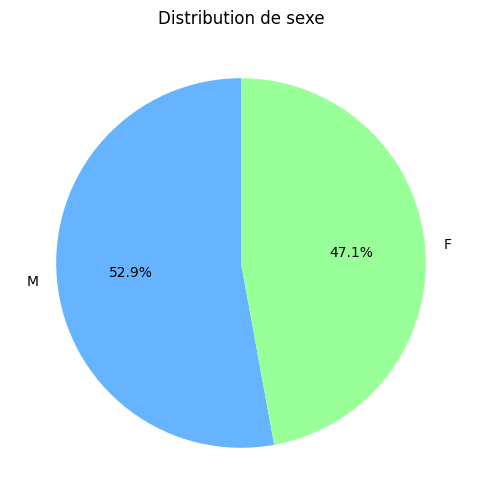

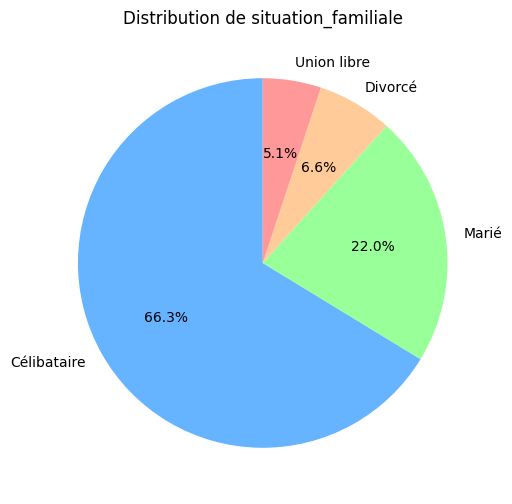

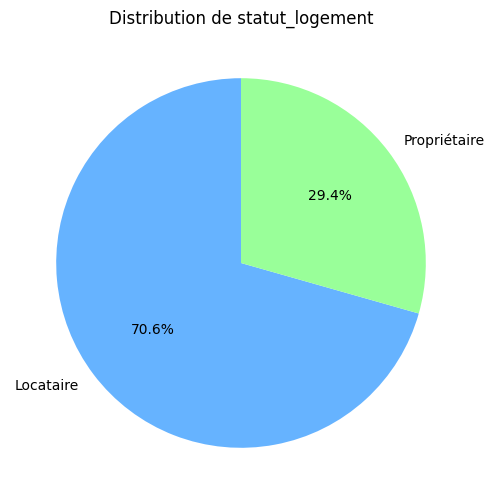

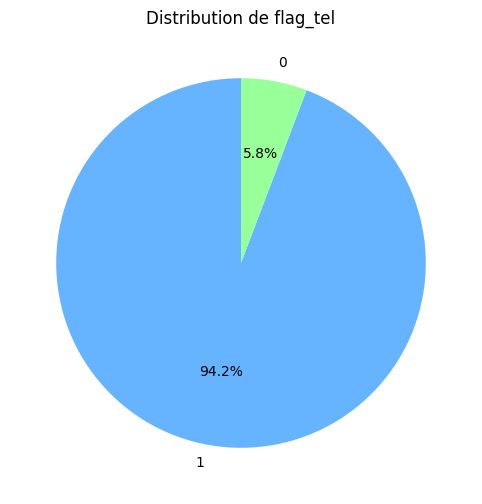

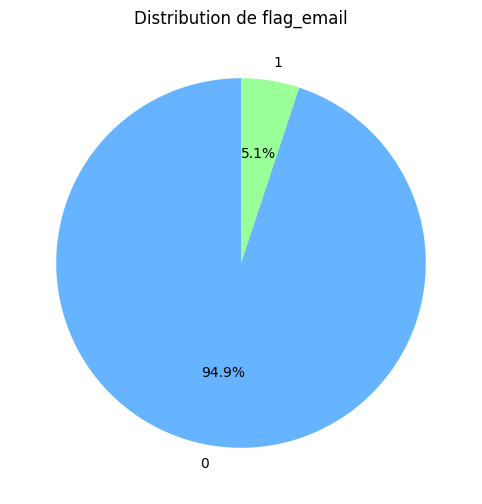

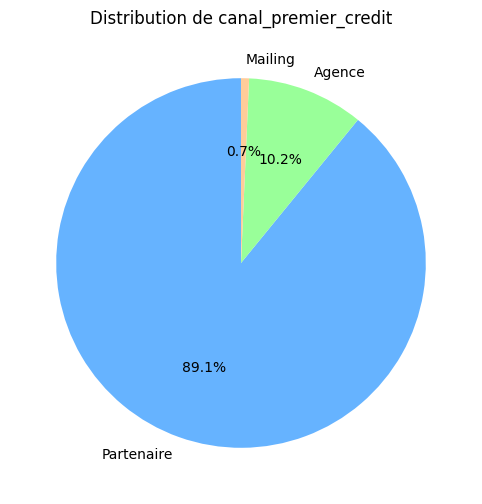

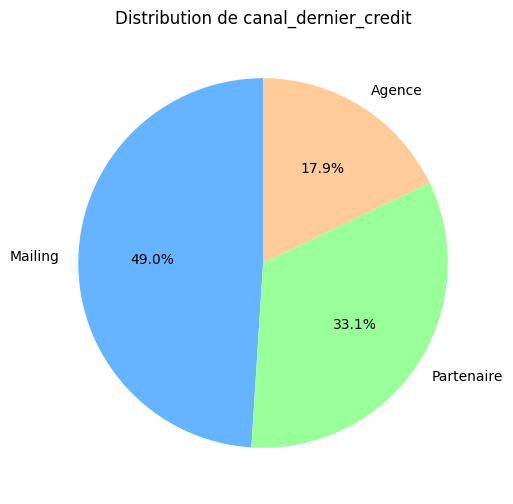

In [71]:
# Afficher les valeurs uniques et leur fréquence
cat_cols = ["sexe", "situation_familiale", "statut_logement","flag_tel","flag_email", "canal_premier_credit", "canal_dernier_credit"]
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"])
    plt.title(f"Distribution de {col}")
    plt.ylabel("")  # Masquer l'axe y
    plt.show()

#### 📌 Variables numériques

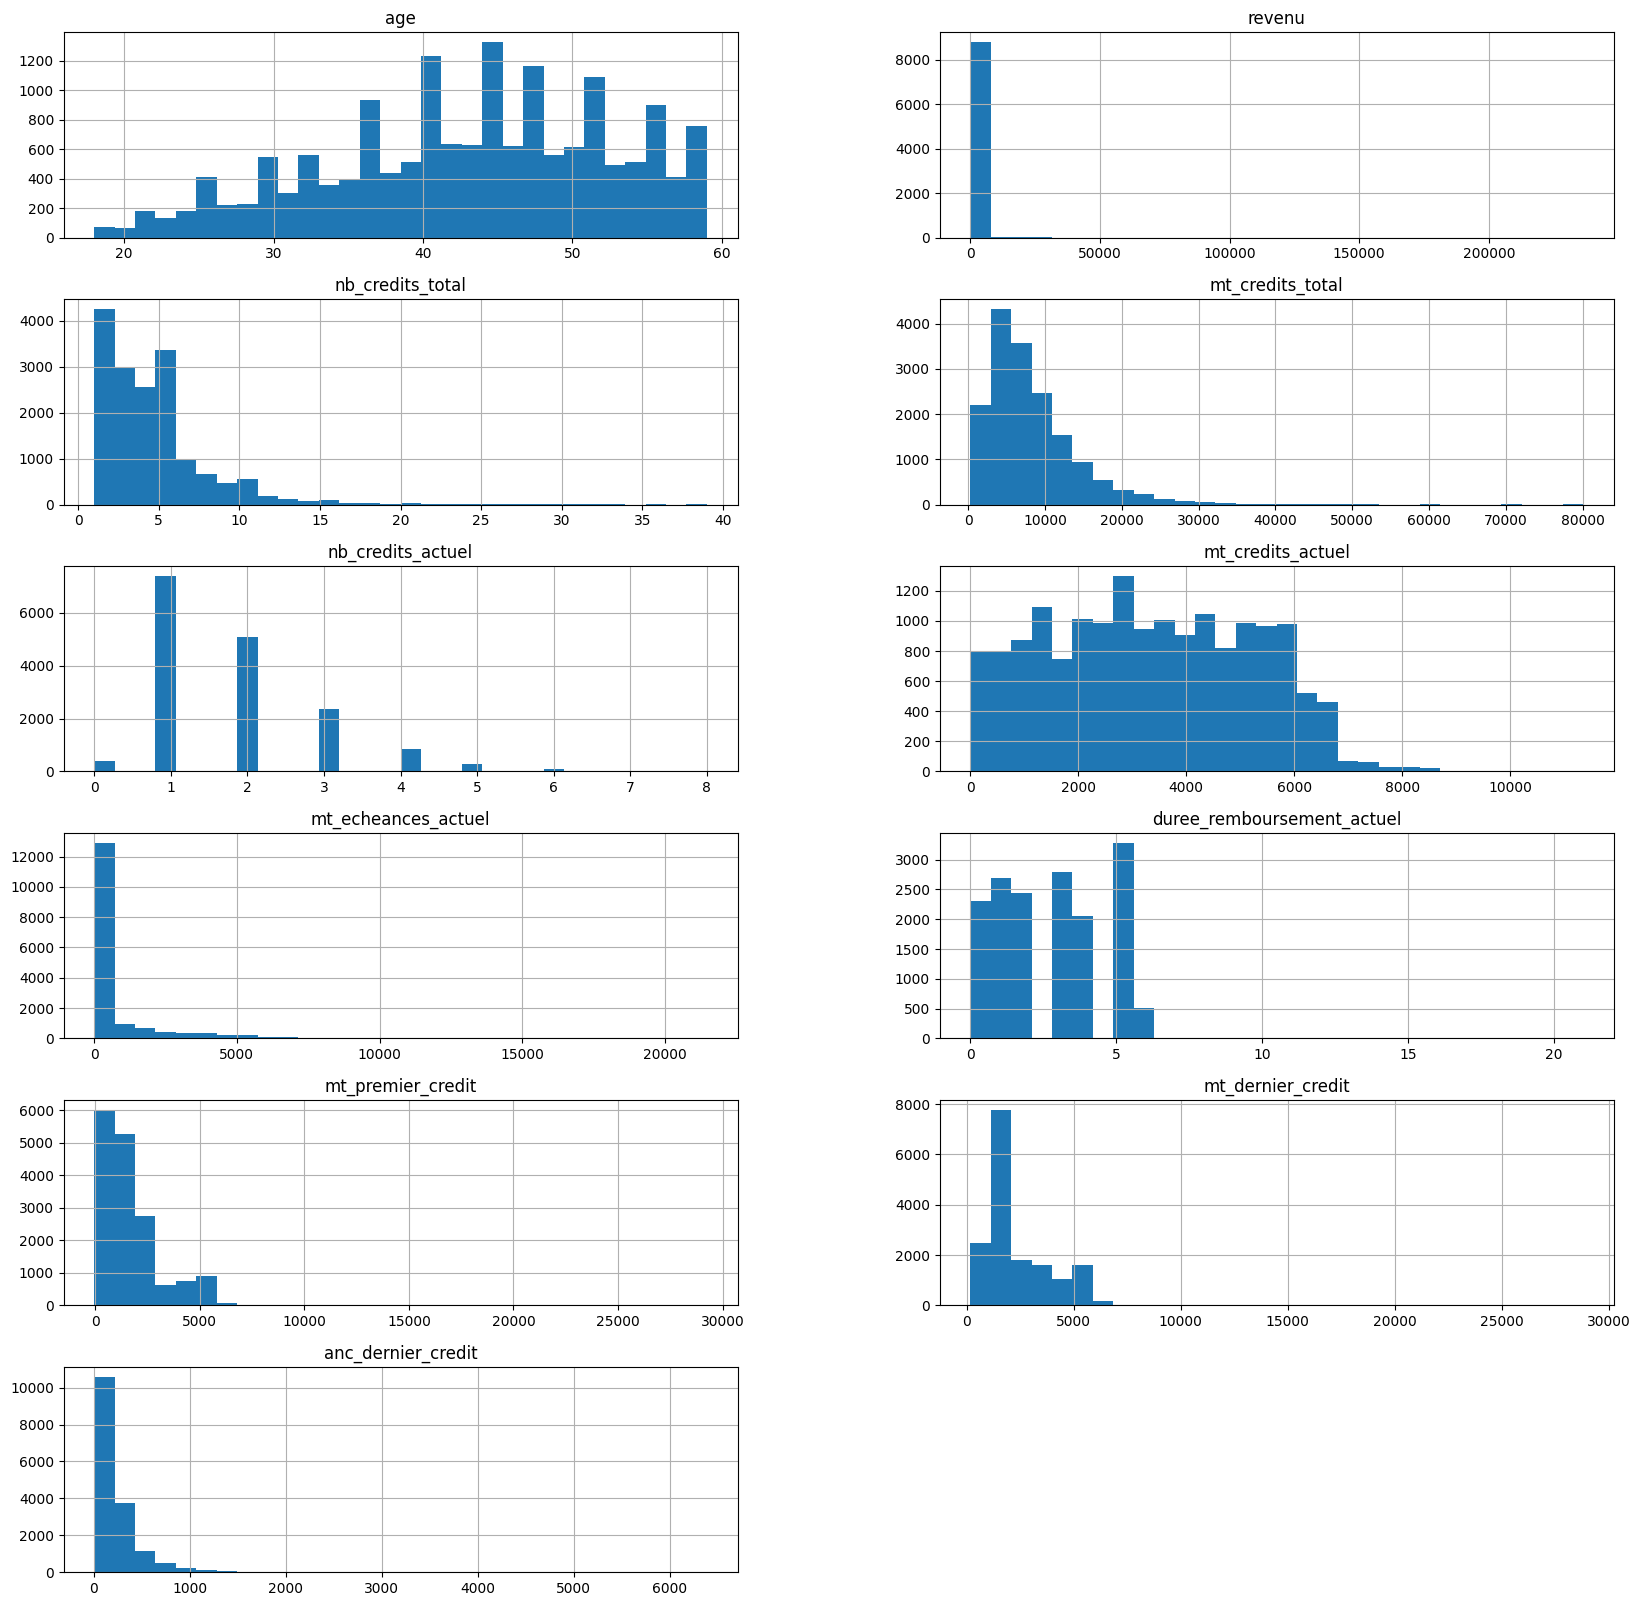

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["age", "revenu", "nb_credits_total", "mt_credits_total", "nb_credits_actuel", "mt_credits_actuel","mt_echeances_actuel","duree_remboursement_actuel","mt_premier_credit", "mt_dernier_credit","anc_dernier_credit"]

# Histogrammes des variables numériques
data[num_cols].hist(bins=30, figsize=(20, 20), layout=(6, 2))
plt.show()


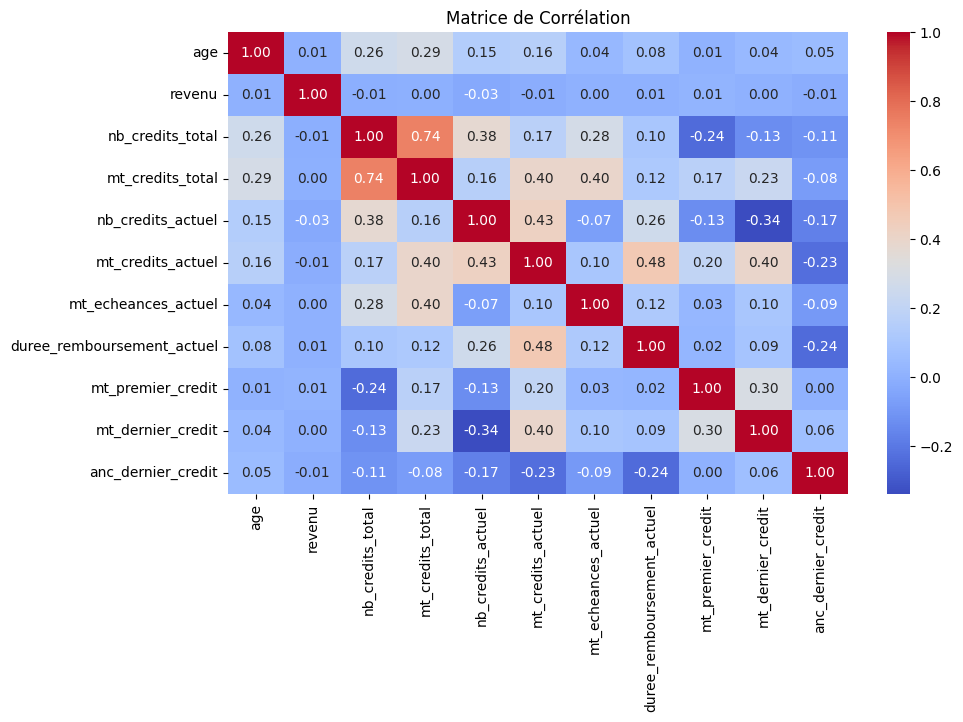

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\231898527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data["nb_credits_actuel"], ax=ax, palette="Set2")
C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\231898527.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\231898527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data["nb_credits_actuel"], ax=ax, palette="Set2")
C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\231898527.py:11: UserWarnin

IndexError: index 2 is out of bounds for axis 0 with size 2

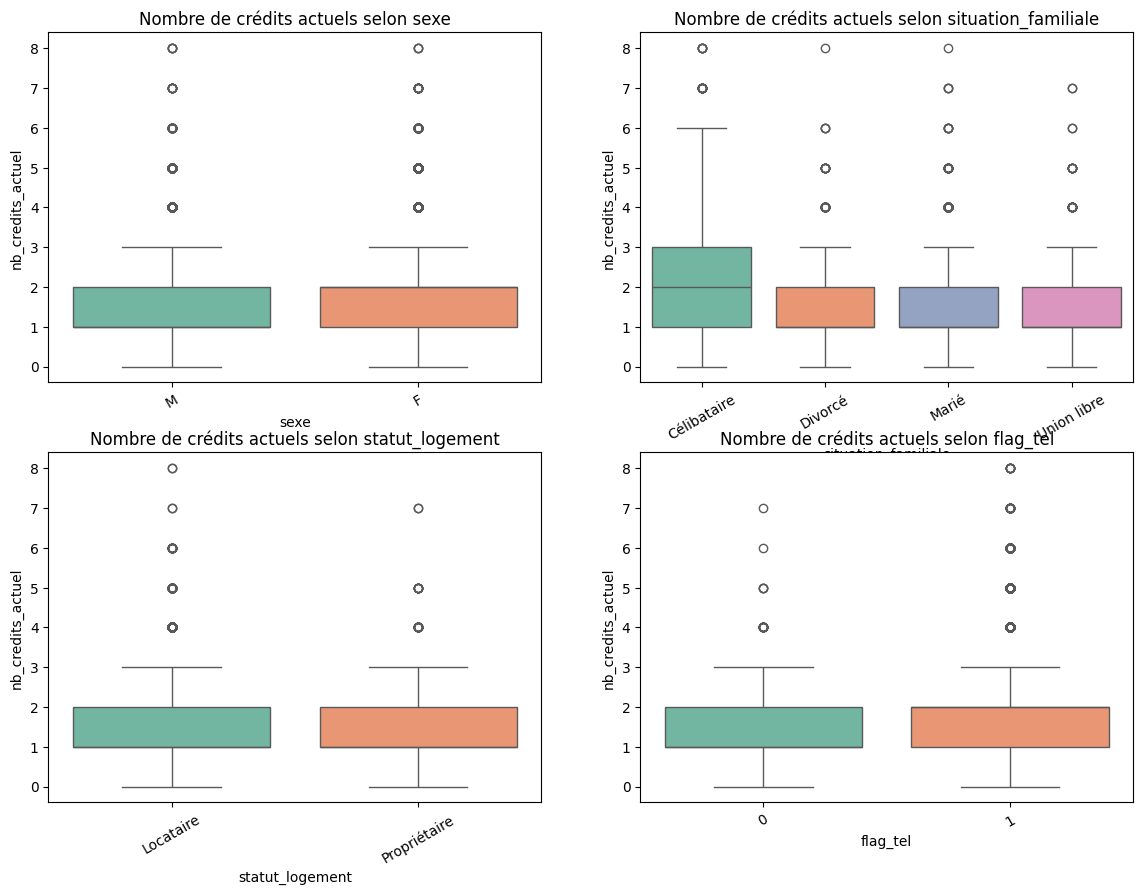

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création des sous-plots pour les variables qualitatives
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(cat_cols):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=data[col], y=data["nb_credits_actuel"], ax=ax, palette="Set2")
    ax.set_title(f"Nombre de crédits actuels selon {col}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

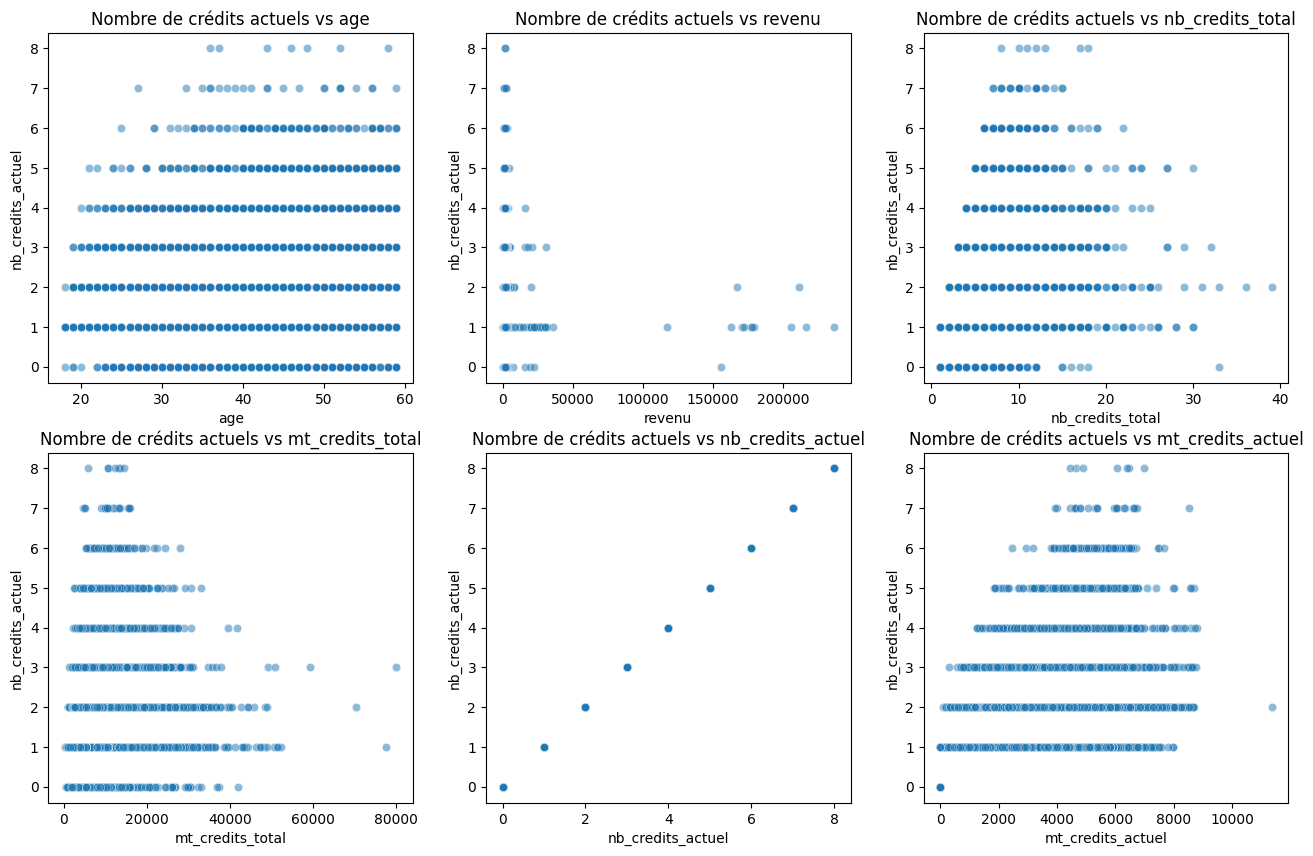

In [73]:
# Scatterplots pour voir la relation entre nb_credits_actuel et chaque variable quantitative
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, col in enumerate(num_cols):
    ax = axes[i // 3, i % 3]
    sns.scatterplot(x=data[col], y=data["nb_credits_actuel"], alpha=0.5, ax=ax)
    ax.set_title(f"Nombre de crédits actuels vs {col}")

plt.tight_layout()
plt.show()

# Heatmap de corrélation pour voir les relations entre nb_credits_actuel et les variables quantitatives
plt.figure(figsize=(10, 6))
corr = data[num_cols + ["nb_credits_actuel"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre nb_credits_actuel et les variables quantitatives")
plt.show()


In [78]:
# 1. Filtrer par revenu (clients avec un revenu au-dessus de la médiane)
#seuil_revenu = data["revenu"].quantile(0.25)

# 2. Filtrer par nombre de crédits actuels (au moins entre 1 et 3)
clients_avec_credits = data[(data["nb_credits_actuel"] > 1) & (data["nb_credits_actuel"] < 4)]

# 3. Filtrer par montant total des crédits (supérieur au seuil moyen)
seuil_montant_credits = data["mt_credits_actuel"].quantile(0.75)
clients_avec_bon_montant = clients_avec_credits[clients_avec_credits["mt_credits_actuel"] < seuil_montant_credits]

# 4. Filtrer par durée restante des crédits (durée < 3 ans)
clients_duree_courte = clients_avec_bon_montant[clients_avec_bon_montant["duree_remboursement_actuel"] < 4]

# 5. Filtrer par ancienneté du dernier crédit (moins de 6 mois)
seuil_anciennete_dernier_credit = 400  # 6 mois en jours
clients_recent_dernier_credit = clients_duree_courte[clients_duree_courte["anc_dernier_credit"] <= seuil_anciennete_dernier_credit]
# 7. Sélectionner les 2000 meilleurs clients par score décroissant (par exemple, basé sur revenu et montant des crédits)


In [79]:
top_2000_clients = clients_recent_dernier_credit.nlargest(2000, ["revenu", "mt_credits_actuel"])
top_2000_clients['id_client'].to_csv('c2_valdes.txt', sep=';', index=False, header=False)

(2000,)

## Etape 3 : Analyse des profiles

In [125]:
data_2023 = pd.read_table('base_banque_2023_12.txt', sep=';')
data_2023.head()

,id_client,flag_credit,age,sexe,situation_familiale,statut_logement,revenu,flag_tel,flag_email,nb_credits_total,...,nb_credits_actuel,mt_credits_actuel,mt_echeances_actuel,duree_remboursement_actuel,mt_premier_credit,anc_premier_credit,canal_premier_credit,mt_dernier_credit,anc_dernier_credit,canal_dernier_credit
0,ID_000000716060,0,43,M,Célibataire,NaN,NaN,1,0,6,...,2,2969,218.40,4.0,2066.67,NaN,Partenaire,2666.67,635.0,Mailing
1,ID_000009248044,0,57,F,Marié,NaN,NaN,1,0,1,...,1,273,16.93,1.0,666.67,1678.0,Partenaire,666.67,1678.0,Partenaire
2,ID_000010143079,0,48,M,Célibataire,NaN,NaN,1,0,10,...,3,5519,389.20,2.0,800.00,5355.0,Partenaire,1333.33,63.0,Mailing
3,ID_000013401975,0,46,M,Célibataire,NaN,NaN,1,0,1,...,1,5270,114.80,5.0,5333.33,572.0,Partenaire,5333.33,572.0,Partenaire
4,ID_000015158811,0,53,M,Célibataire,NaN,NaN,1,0,1,...,1,584,38.80,1.0,933.33,756.0,Partenaire,933.33,756.0,Partenaire


In [126]:
num_cols = ["age", "revenu", "nb_credits_total", "mt_credits_total", "nb_credits_actuel", "mt_credits_actuel","mt_echeances_actuel","duree_remboursement_actuel","mt_premier_credit", "anc_premier_credit","mt_dernier_credit","anc_dernier_credit"]

In [127]:
cat_cols = ["sexe", "situation_familiale", "statut_logement","flag_tel","flag_email", "canal_premier_credit", "canal_dernier_credit"]

In [128]:
data_2023.head()

,id_client,flag_credit,age,sexe,situation_familiale,statut_logement,revenu,flag_tel,flag_email,nb_credits_total,...,nb_credits_actuel,mt_credits_actuel,mt_echeances_actuel,duree_remboursement_actuel,mt_premier_credit,anc_premier_credit,canal_premier_credit,mt_dernier_credit,anc_dernier_credit,canal_dernier_credit
0,ID_000000716060,0,43,M,Célibataire,NaN,NaN,1,0,6,...,2,2969,218.40,4.0,2066.67,NaN,Partenaire,2666.67,635.0,Mailing
1,ID_000009248044,0,57,F,Marié,NaN,NaN,1,0,1,...,1,273,16.93,1.0,666.67,1678.0,Partenaire,666.67,1678.0,Partenaire
2,ID_000010143079,0,48,M,Célibataire,NaN,NaN,1,0,10,...,3,5519,389.20,2.0,800.00,5355.0,Partenaire,1333.33,63.0,Mailing
3,ID_000013401975,0,46,M,Célibataire,NaN,NaN,1,0,1,...,1,5270,114.80,5.0,5333.33,572.0,Partenaire,5333.33,572.0,Partenaire
4,ID_000015158811,0,53,M,Célibataire,NaN,NaN,1,0,1,...,1,584,38.80,1.0,933.33,756.0,Partenaire,933.33,756.0,Partenaire


In [129]:
data_2023[cat_cols].head()

,sexe,situation_familiale,statut_logement,flag_tel,flag_email,canal_premier_credit,canal_dernier_credit
0,M,Célibataire,NaN,1,0,Partenaire,Mailing
1,F,Marié,NaN,1,0,Partenaire,Partenaire
2,M,Célibataire,NaN,1,0,Partenaire,Mailing
3,M,Célibataire,NaN,1,0,Partenaire,Partenaire
4,M,Célibataire,NaN,1,0,Partenaire,Partenaire


In [130]:
data_2023[num_cols].head()

,age,revenu,nb_credits_total,mt_credits_total,nb_credits_actuel,mt_credits_actuel,mt_echeances_actuel,duree_remboursement_actuel,mt_premier_credit,anc_premier_credit,mt_dernier_credit,anc_dernier_credit
0,43,NaN,6,12314,2,2969,218.40,4.0,2066.67,NaN,2666.67,635.0
1,57,NaN,1,667,1,273,16.93,1.0,666.67,1678.0,666.67,1678.0
2,48,NaN,10,21867,3,5519,389.20,2.0,800.00,5355.0,1333.33,63.0
3,46,NaN,1,5333,1,5270,114.80,5.0,5333.33,572.0,5333.33,572.0
4,53,NaN,1,933,1,584,38.80,1.0,933.33,756.0,933.33,756.0


In [131]:
data_2023[data_2023['flag_credit']==1].head()

,id_client,flag_credit,age,sexe,situation_familiale,statut_logement,revenu,flag_tel,flag_email,nb_credits_total,...,nb_credits_actuel,mt_credits_actuel,mt_echeances_actuel,duree_remboursement_actuel,mt_premier_credit,anc_premier_credit,canal_premier_credit,mt_dernier_credit,anc_dernier_credit,canal_dernier_credit
9,ID_000033880428,1,46,F,Divorcé,Locataire,1946.67,1,0,3,...,2,4594,224.80,2.0,1333.33,3905.0,Partenaire,666.67,112.0,Agence
12,ID_000047108403,1,55,F,Célibataire,NaN,NaN,1,0,5,...,2,2133,124.41,2.0,1600.00,3134.0,Partenaire,1333.33,661.0,Mailing
24,ID_000072402007,1,36,F,Marié,Propriétaire,1666.67,1,0,5,...,1,1991,130.80,1.0,800.00,3553.0,Partenaire,1333.33,13.0,Agence
25,ID_000073821306,1,29,M,NaN,Propriétaire,1733.33,0,0,1,...,1,2025,129.20,1.0,2000.00,154.0,Partenaire,2000.00,154.0,Partenaire
28,ID_000090631618,1,42,F,Célibataire,NaN,NaN,1,0,6,...,4,6187,214.40,6.0,4000.00,2049.0,Partenaire,1333.33,96.0,Mailing


In [132]:
data_2023.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33663 entries, 0 to 33662
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_client                   33663 non-null  object 
 1   flag_credit                 33663 non-null  int64  
 2   age                         33663 non-null  int64  
 3   sexe                        33663 non-null  object 
 4   situation_familiale         33042 non-null  object 
 5   statut_logement             19081 non-null  object 
 6   revenu                      20102 non-null  float64
 7   flag_tel                    33663 non-null  int64  
 8   flag_email                  33663 non-null  int64  
 9   nb_credits_total            33663 non-null  int64  
 10  mt_credits_total            33663 non-null  int64  
 11  nb_credits_actuel           33663 non-null  int64  
 12  mt_credits_actuel           33663 non-null  int64  
 13  mt_echeances_actuel         336

In [133]:
data_2023['flag_credit']=data_2023['flag_credit'].astype('category')

In [134]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33663 entries, 0 to 33662
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id_client                   33663 non-null  object  
 1   flag_credit                 33663 non-null  category
 2   age                         33663 non-null  int64   
 3   sexe                        33663 non-null  object  
 4   situation_familiale         33042 non-null  object  
 5   statut_logement             19081 non-null  object  
 6   revenu                      20102 non-null  float64 
 7   flag_tel                    33663 non-null  int64   
 8   flag_email                  33663 non-null  int64   
 9   nb_credits_total            33663 non-null  int64   
 10  mt_credits_total            33663 non-null  int64   
 11  nb_credits_actuel           33663 non-null  int64   
 12  mt_credits_actuel           33663 non-null  int64   
 13  mt_echeances_act

In [135]:
data_2023[cat_cols]=data_2023[cat_cols].astype('category')

In [136]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33663 entries, 0 to 33662
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id_client                   33663 non-null  object  
 1   flag_credit                 33663 non-null  category
 2   age                         33663 non-null  int64   
 3   sexe                        33663 non-null  category
 4   situation_familiale         33042 non-null  category
 5   statut_logement             19081 non-null  category
 6   revenu                      20102 non-null  float64 
 7   flag_tel                    33663 non-null  category
 8   flag_email                  33663 non-null  category
 9   nb_credits_total            33663 non-null  int64   
 10  mt_credits_total            33663 non-null  int64   
 11  nb_credits_actuel           33663 non-null  int64   
 12  mt_credits_actuel           33663 non-null  int64   
 13  mt_echeances_act

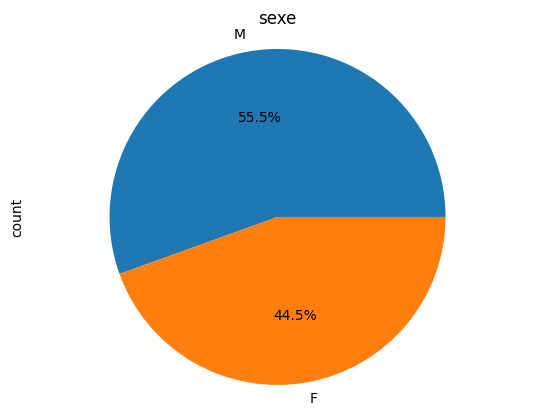

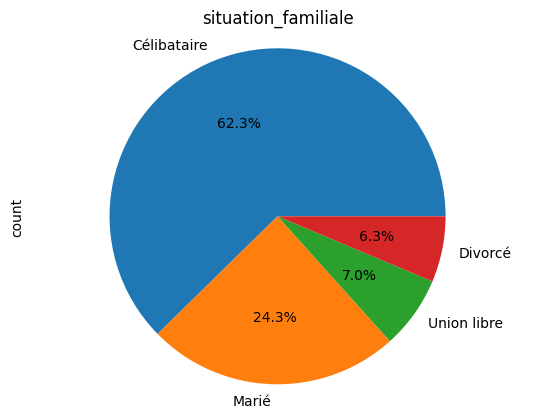

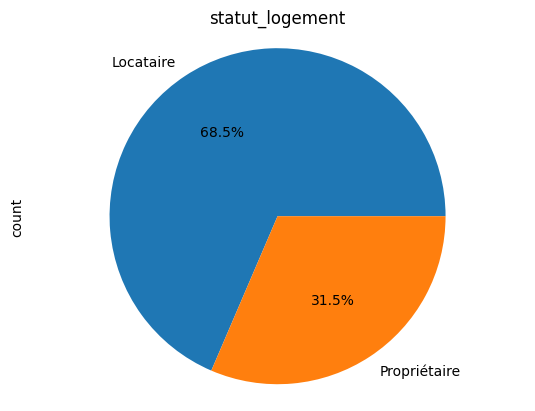

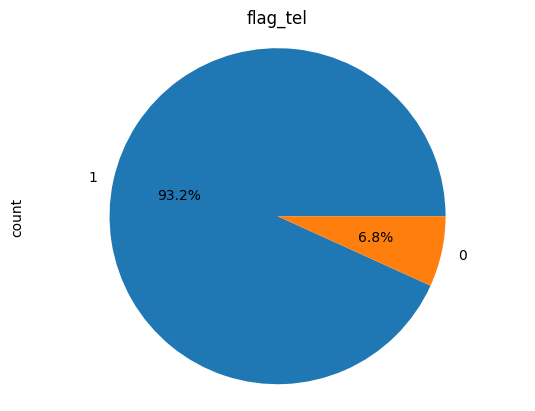

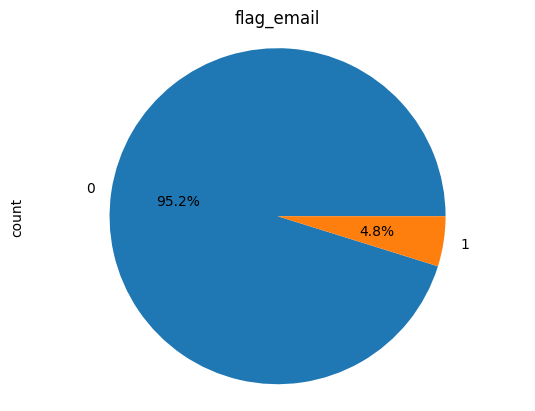

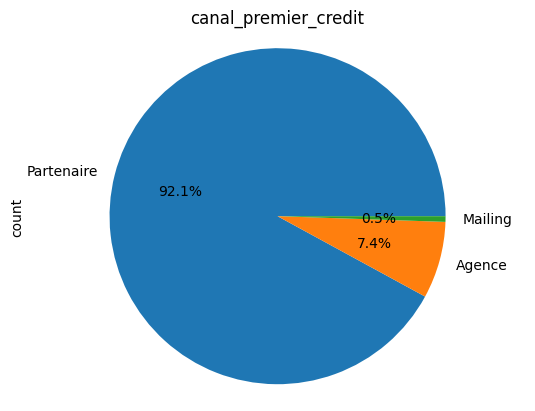

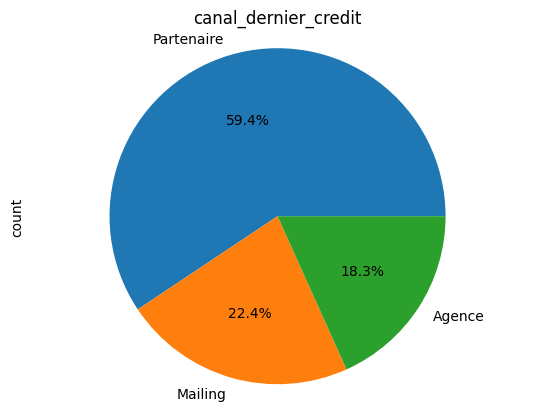

In [137]:
# Générer un pie plot pour chaque variable catégorielle
for var in cat_cols:
    data_2023[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

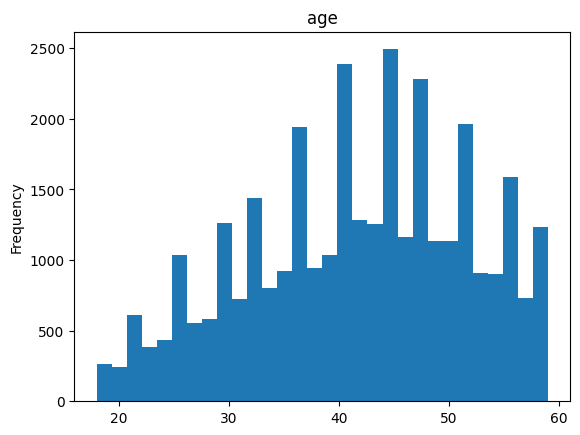

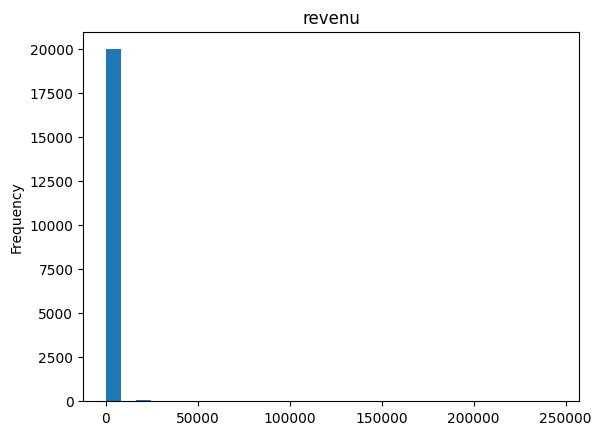

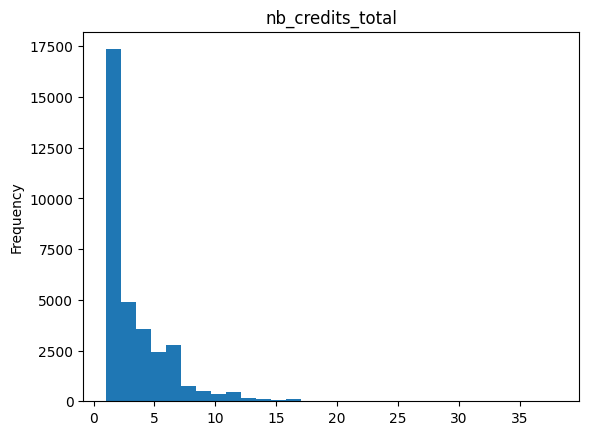

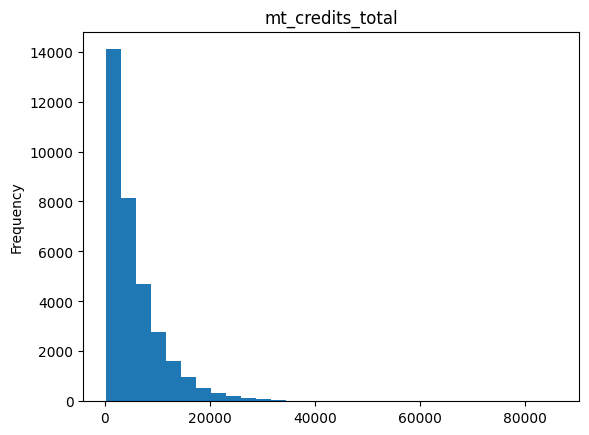

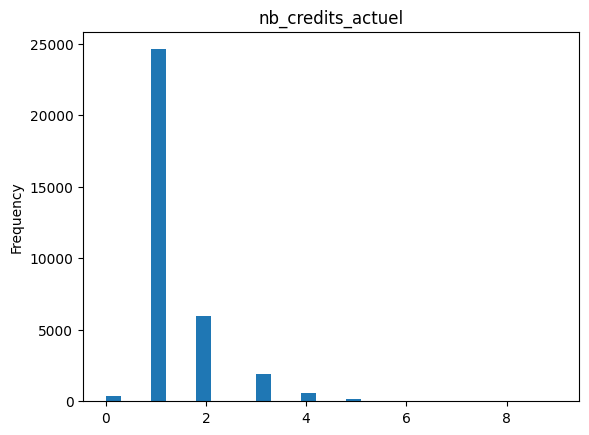

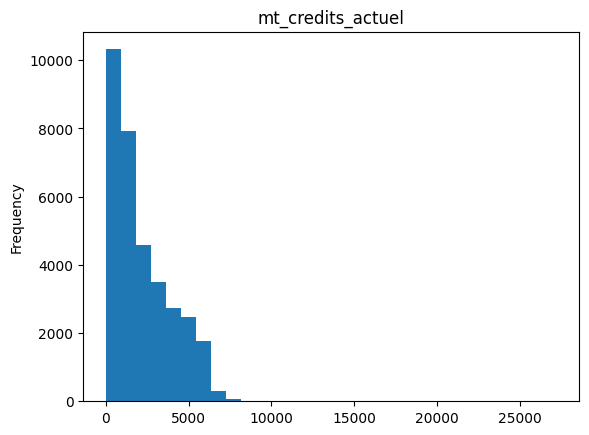

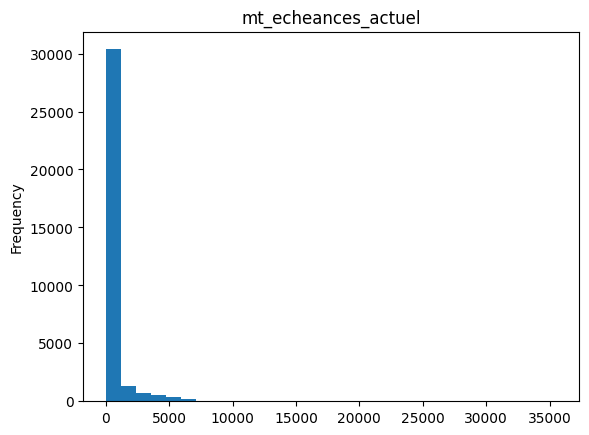

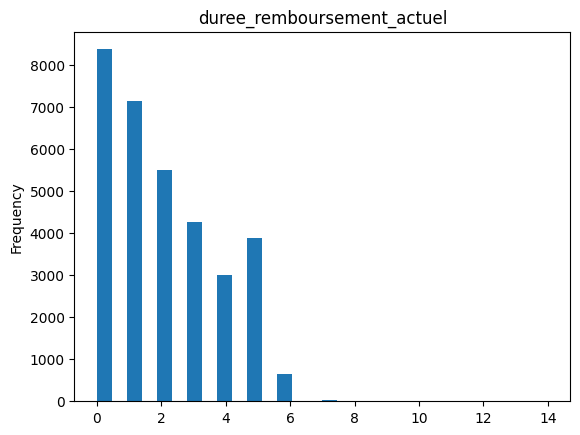

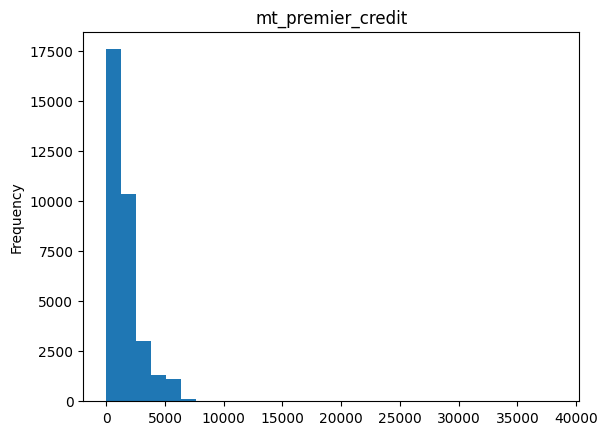

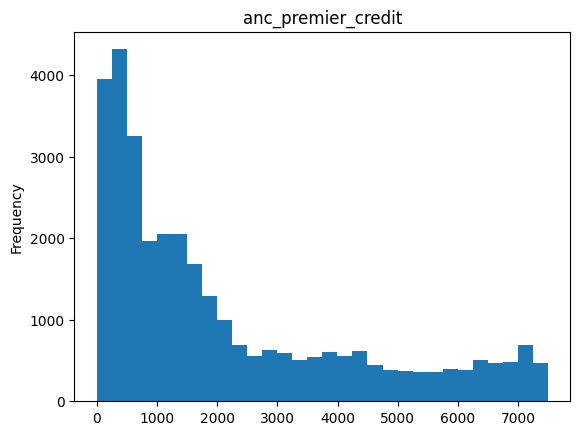

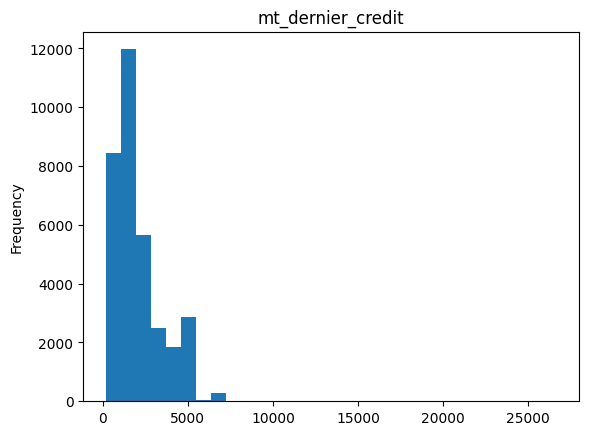

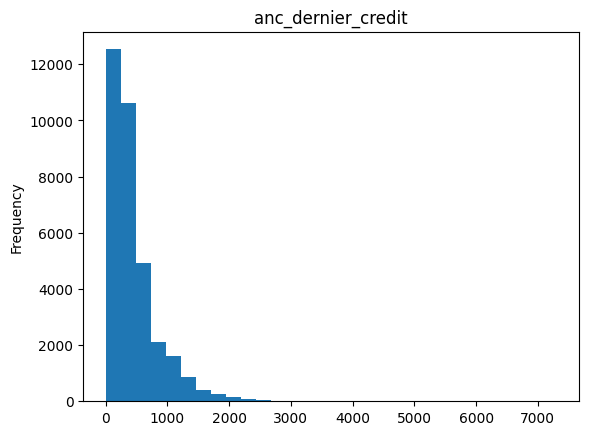

In [138]:
for var in num_cols:
    data_2023[var].plot(kind='hist', bins=30)
    plt.title(var)
    plt.show()
    

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\3329944851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data_2023.groupby([var, 'flag_credit'])['flag_credit'].count()/data_2023.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)


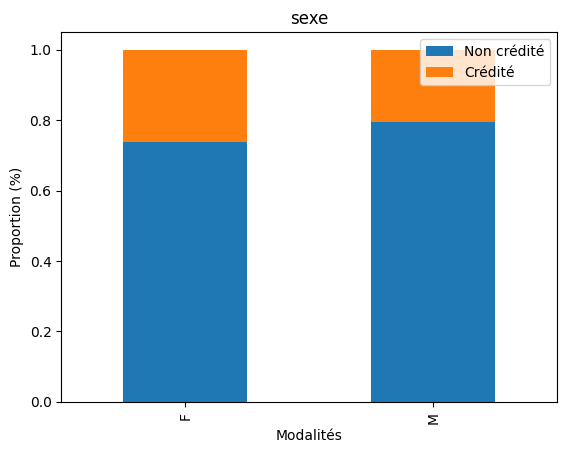

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\3329944851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data_2023.groupby([var, 'flag_credit'])['flag_credit'].count()/data_2023.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)


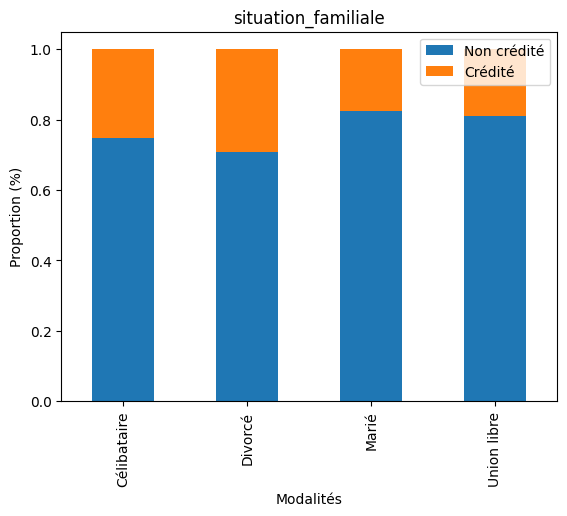

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\3329944851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data_2023.groupby([var, 'flag_credit'])['flag_credit'].count()/data_2023.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)


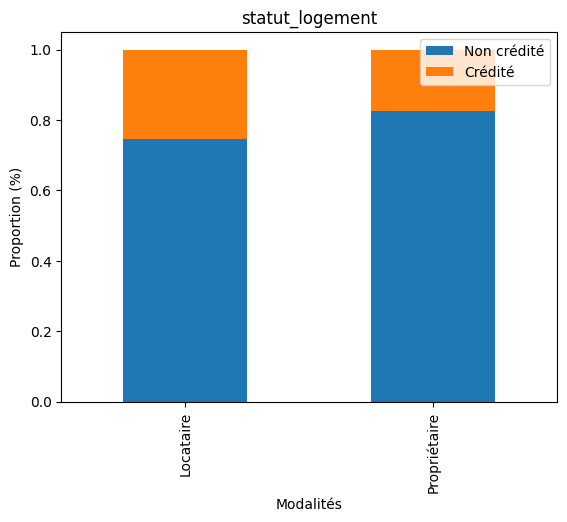

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\3329944851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data_2023.groupby([var, 'flag_credit'])['flag_credit'].count()/data_2023.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)


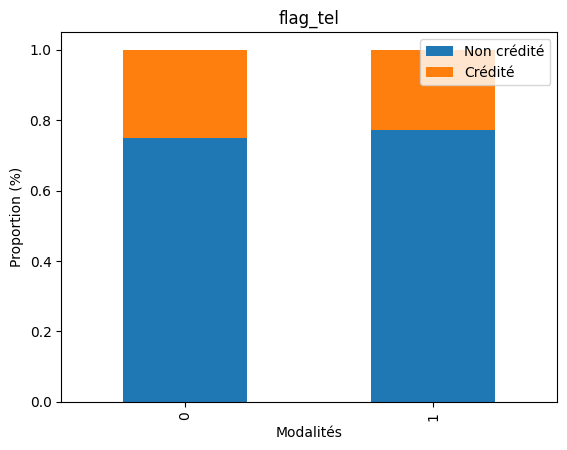

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\3329944851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data_2023.groupby([var, 'flag_credit'])['flag_credit'].count()/data_2023.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)


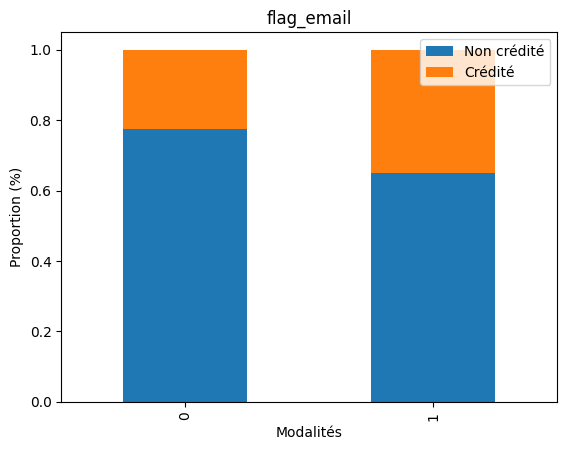

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\3329944851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data_2023.groupby([var, 'flag_credit'])['flag_credit'].count()/data_2023.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)


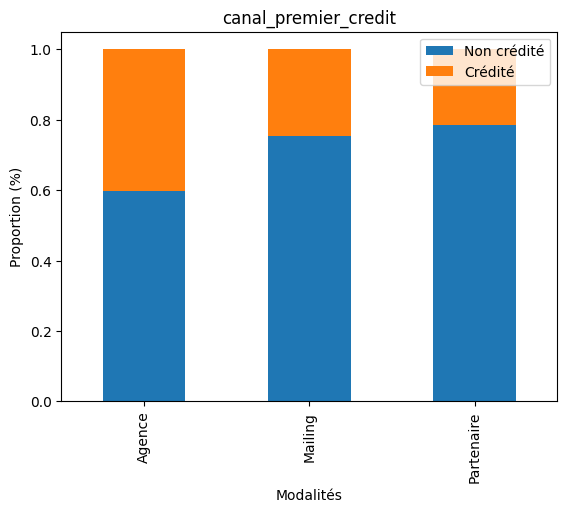

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\3329944851.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data_2023.groupby([var, 'flag_credit'])['flag_credit'].count()/data_2023.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)


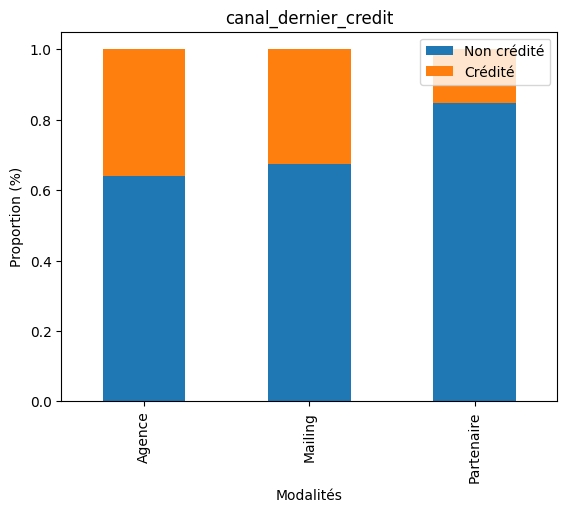

In [139]:
# Générer un bar plot pour chaque variable catégorielle
for var in cat_cols:
    figsize = (20, 20)
    (data_2023.groupby([var, 'flag_credit'])['flag_credit'].count()/data_2023.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Non crédité', 'Crédité'])
    plt.show()

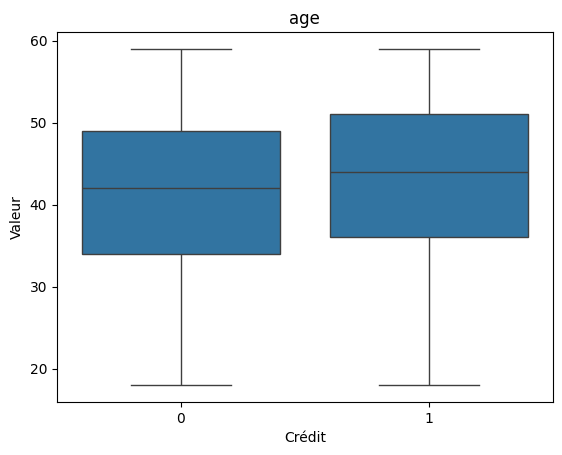

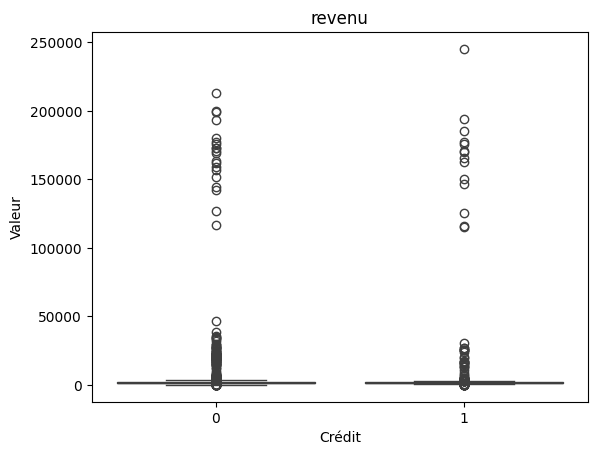

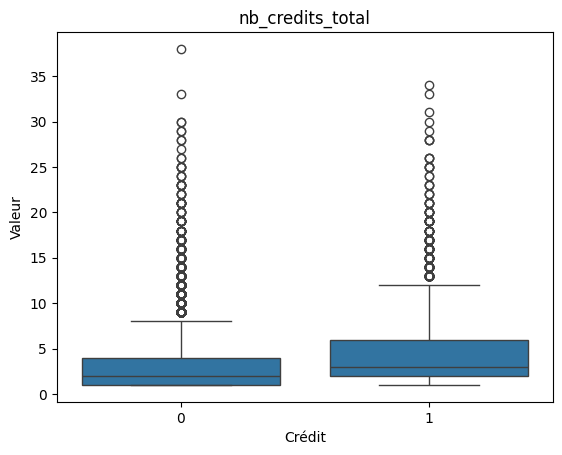

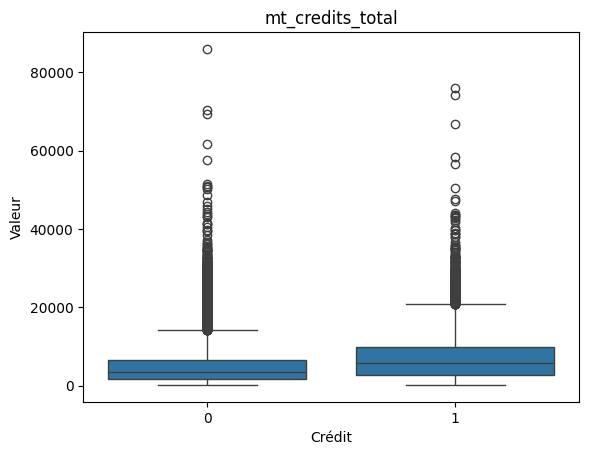

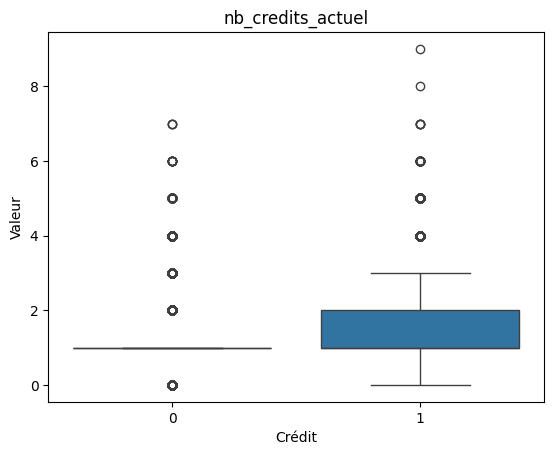

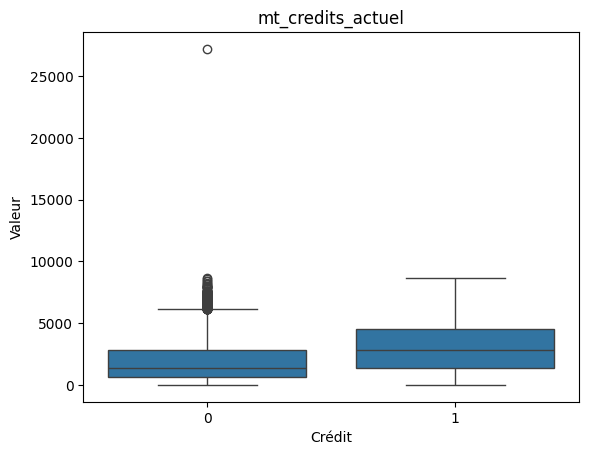

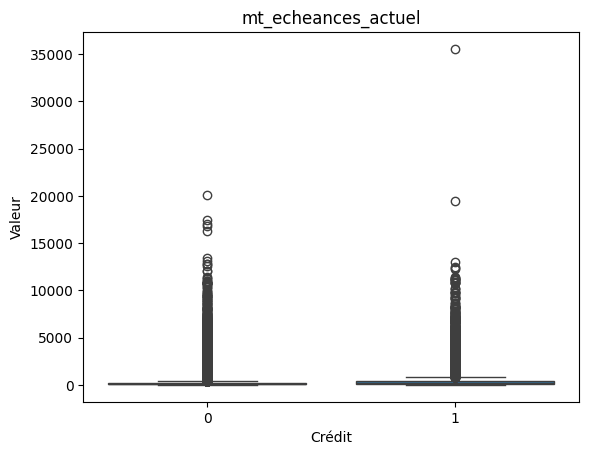

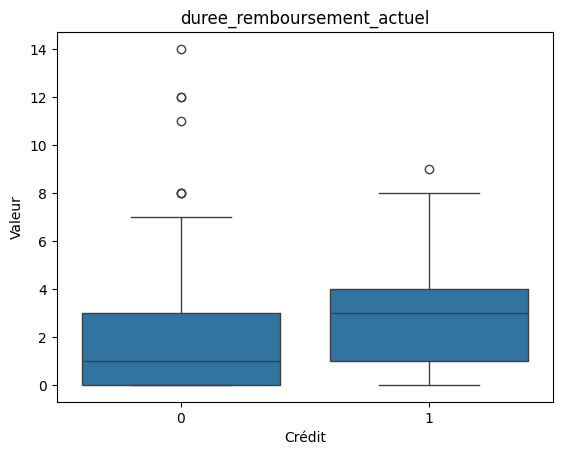

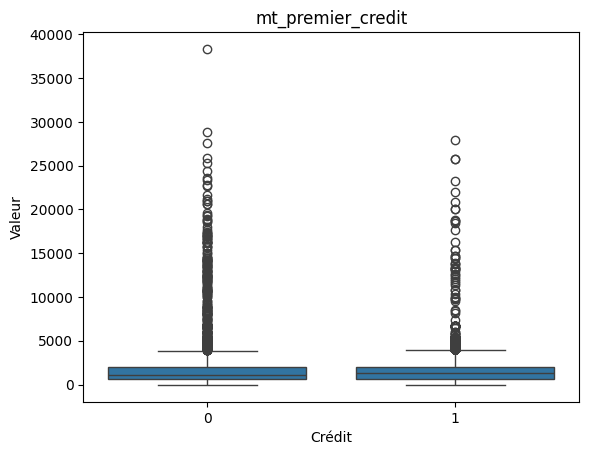

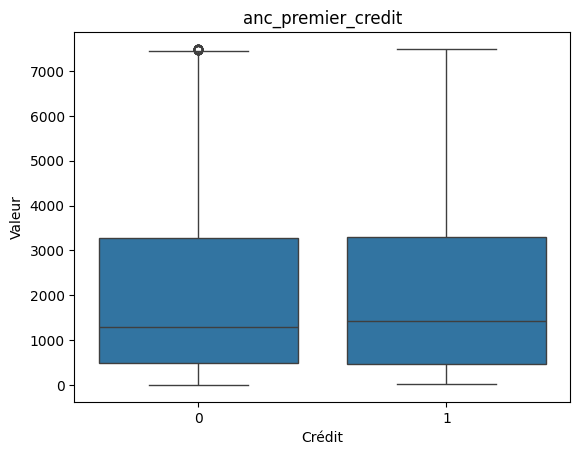

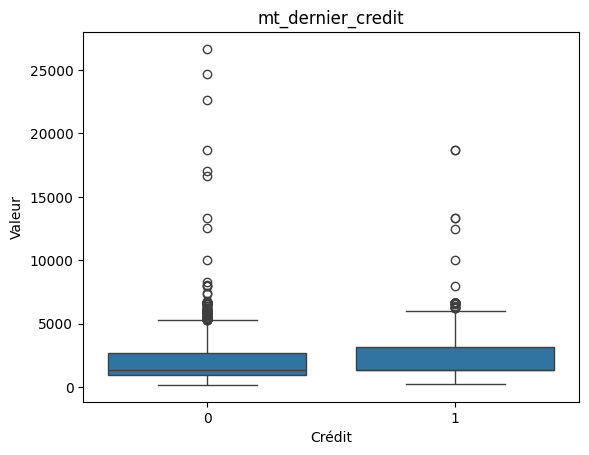

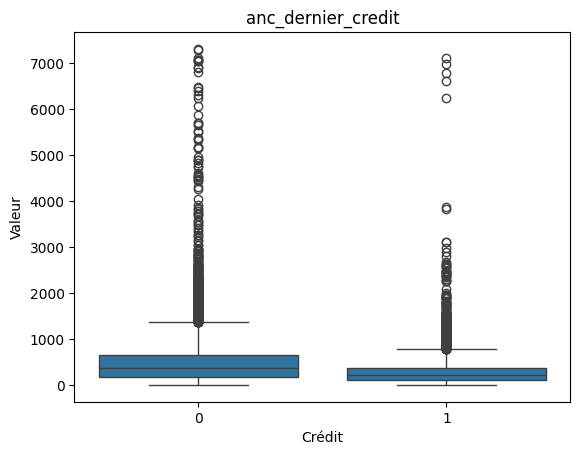

In [140]:
for var in num_cols:
    sns.boxplot(x='flag_credit', y=var, data=data_2023)
    plt.title(var)
    plt.xlabel('Crédit')
    plt.ylabel('Valeur')
    plt.show()

In [141]:
from scipy.stats import kstest

# Fonction pour effectuer le test de Kolmogorov-Smirnov
def kolmogorov_smirnov_test(data, flag_col, num_cols):
    results = {}
    for col in num_cols:
        # Séparer les données en deux groupes selon la variable flag_credit
        group1 = data[data[flag_col] == 0][col].dropna()
        group2 = data[data[flag_col] == 1][col].dropna()
        
        # Effectuer le test de Kolmogorov-Smirnov
        stat, p_value = kstest(group1, group2)
        results[col] = {'statistic': stat, 'p_value': p_value}
    
    return results

# Exécuter le test de Kolmogorov-Smirnov
ks_results = kolmogorov_smirnov_test(data_2023, 'flag_credit', num_cols)

# # Afficher les résultats
for col, result in ks_results.items():
    print(f"Variable: {col}")
    print(f"  Statistic: {result['statistic']}")
    print(f"  P-value: {result['p_value']}\n")
    
# selectionner les 5 varibles significatives avec la plus grande valeur de la statistique
selected_vars = sorted(ks_results, key=lambda x: ks_results[x]['statistic'], reverse=True)[:5]

selected_vars

Variable: age
  Statistic: 0.06335489826447194
  P-value: 3.2394327536360347e-21

Variable: revenu
  Statistic: 0.047630294900204484
  P-value: 1.9800566385541942e-07

Variable: nb_credits_total
  Statistic: 0.19555052318608157
  P-value: 6.424228448909194e-200

Variable: mt_credits_total
  Statistic: 0.2120091859648826
  P-value: 2.859207363431655e-235

Variable: nb_credits_actuel
  Statistic: 0.22504283672616754
  P-value: 2.2302166592237235e-265

Variable: mt_credits_actuel
  Statistic: 0.2738477635205139
  P-value: 0.0

Variable: mt_echeances_actuel
  Statistic: 0.20286658772882482
  P-value: 2.8820419662810666e-215

Variable: duree_remboursement_actuel
  Statistic: 0.21490455121739566
  P-value: 8.771275183132382e-238

Variable: mt_premier_credit
  Statistic: 0.058690361604880725
  P-value: 2.8854459428588557e-18

Variable: anc_premier_credit
  Statistic: 0.03990741834896455
  P-value: 2.777119225077035e-08

Variable: mt_dernier_credit
  Statistic: 0.1267379990702143
  P-value: 8.

['mt_credits_actuel',
 'anc_dernier_credit',
 'nb_credits_actuel',
 'duree_remboursement_actuel',
 'mt_credits_total']

les variables quantitatives qui ont été retenues sont

**le montant du credit actuel**
**L'ancienneté du dernier crédit**
**Le nombre de crédit actuel**
**La durée de remboursement du crédit actuel**
**Le montant total du crédit**

In [142]:
import scipy.stats as stats

# Fonction pour calculer le V de Cramer

def cramers_v(var1, var2):
    """Calcule le V de Cramer entre deux variables catégorielles"""
    table = pd.crosstab(var1, var2)  # Tableau de contingence
    chi2 = stats.chi2_contingency(table)[0]  # Statistique Khi²
    n = table.sum().sum()  # Effectif total
    k = min(table.shape)  # Plus petit nombre de modalités
    return np.sqrt(chi2 / (n * (k - 1)))

# Calculer le V de Cramer pour chaque paire de variables catégorielles en utilisant la fonction
table_cramer={}
for var in cat_cols:
    table_cramer[var]=cramers_v(data_2023[var],data_2023['flag_credit']).round(2)
table_cramer

{'sexe': np.float64(0.07),
 'situation_familiale': np.float64(0.09),
 'statut_logement': np.float64(0.09),
 'flag_tel': np.float64(0.01),
 'flag_email': np.float64(0.06),
 'canal_premier_credit': np.float64(0.12),
 'canal_dernier_credit': np.float64(0.22)}

On observe donc que deux variables permettent de discriminer reellement si la personne souscrit ou pas au credit. Les deux variables sont : 
 - **le canal du premier credit**
 - **le canal du dernier credit**


In [143]:
def tschuprow(var1, var2):
    """Calcule le V de Cramer entre deux variables catégorielles"""
    table = pd.crosstab(var1, var2)  # Tableau de contingence
    chi2 = stats.chi2_contingency(table)[0]  # Statistique Khi²
    n = table.sum().sum()  # Effectif total
    k1 = table.shape[0] 
    k2 = table.shape[1] # Plus petit nombre de modalités
    return np.sqrt(chi2 / (n * np.sqrt(k1 - 1)*(k2 - 1)))

# Calculer du coef de tschuprow pour chaque paire de variables catégorielles en utilisant la fonction
table_tschuprow={}
for var in cat_cols:
    table_tschuprow[var]=tschuprow(data_2023[var],data_2023['flag_credit']).round(2)
table_tschuprow

{'sexe': np.float64(0.07),
 'situation_familiale': np.float64(0.07),
 'statut_logement': np.float64(0.09),
 'flag_tel': np.float64(0.01),
 'flag_email': np.float64(0.06),
 'canal_premier_credit': np.float64(0.1),
 'canal_dernier_credit': np.float64(0.19)}

Les mêmes variables sont obtenues ici.